## Proyecto Final
## Mariana Godina
## Rodrigo Andrés Morales Mendoza
## Sonia Mendizábal

In [10]:
#seguro no hay problema
import pandas as pd
import numpy as np
import sklearn.metrics as mtrcs
import math

from scipy.stats import norm
from scipy import stats as st
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

### Sklearn

In [9]:
datos = pd.read_csv("limpio_credit_modif_07.csv", header = 'infer')
#print datos[0:5]
#X_train, X_test,Y_train,Y_test = train_test_split(datos[datos.columns[0:57]],datos[datos.columns[-1]], train_size=0.75)
#print type(datos) #datos is a panda data frame
vec1 = datos.iloc[0]
sizeData = datos.shape
numObs = sizeData[0]
numFeatures = sizeData[1]
print 'numObs = ', numObs
print 'numFeatures = ', numFeatures
#la columna 24 es donde está el "y", que son los defaults de pago
#rangeX = range(24) + range(25, numFeatures+1)

#X = datos[datos.columns[0:24]]
## Dos formas de conseguir las X, pero lo importante es que sea en el rango correcto:
#X = datos.iloc[:,range(24) + range(25, numFeatures)]  
X = datos[datos.columns[range(24) + range(25, numFeatures)]]
y = datos[datos.columns[24]]

X_categorical = datos.iloc[:,range(2,5) + range(6,12) + range(25,26) +range(51, 63)]  

######### Si se quiere checar que se est
#print 'Just to check that pay_0-6 is non-negative: '
#print X_categorical.iloc[0:10, range(3,9)]
#print X
#print Y
#print 'X.iloc[0:5, 22:27] = '
#print X.iloc[0:5, 22:27]
# print '------------------------------------------------------------------------'
# print X[0:10]
#print X_categorical[0:10]
# print '------------------------------------------------------------------------'
# print y[0:10]
# print '------------------------------------------------------------------------'

X_train, X_test,Y_train,Y_test = train_test_split(X,y, train_size=0.75)
X_cat_train, X_cat_test,Y_cat_train,Y_cat_test = train_test_split(X_categorical,y, train_size=0.75)

X_nonCat = datos.iloc[:,range(1,2) + range(12, 24)]  
X_noncat_train, X_noncat_test,Y_noncat_train,Y_noncat_test = train_test_split(X_nonCat,y, train_size=0.75)

#d=X_train.as_matrix()
#dy=Y_train.as_matrix()

numObs =  30000
numFeatures =  69


In [6]:
#gnb = GaussianNB()
mnb = MultinomialNB()
##y_pred = gnb.fit(X, y).predict(X)

#### Entrenamos el multinomial model con las categóricas (del conjunto de entrenamiento:
##print 'X_cat_train.shape = ', X_cat_train.shape
##print 'Y_cat_train.shape = ', Y_cat_train.shape
y_pred = mnb.fit(X_cat_train, Y_cat_train).predict(X_cat_train)
##print 'y_pred.shape = ', y_pred.shape
y_pred_test = mnb.predict(X_cat_test)

#### Y obtenemos nuestras medidas de qué tan bien aprende el modelo:
print '------------------------------------------------------------------------'
print 'Performance over the training set: '
print 'confusionmatrix = ', confusion_matrix(Y_cat_train, y_pred)
print 'precision = ', mtrcs.precision_score(Y_cat_train, y_pred)
print 'recall = ', mtrcs.recall_score(Y_cat_train, y_pred)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_train, y_pred)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_cat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_cat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_cat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_test, y_pred_test)

 ------------------------------------------------------------------------
Performance over the training set: 
confusionmatrix =  [[16100  1415]
 [ 3129  1856]]
precision =  0.567410577805
recall =  0.372316950853
Accuracy Score =  0.798044444444
------------------------------------------------------------------------
Performance over the TEST set *- the important one -* : 
confusionmatrix =  [[5388  461]
 [1032  619]]
precision =  0.573148148148
recall =  0.37492428831
Accuracy Score =  0.800933333333


In [8]:
## Corremosn GaussianNB
gnb = GaussianNB()
############ No jala porque el input debe ser non-negative...
y_pred = mnb.fit(X_noncat_train, Y_noncat_train).predict(X_noncat_train)
##print 'y_pred.shape = ', y_pred.shape
y_pred_test = mnb.predict(X_noncat_test)

#### Y obtenemos nuestras medidas de qué tan bien aprende el modelo:
print '------------------------------------------------------------------------'
print 'Performance over the training set: '
print 'confusionmatrix = ', confusion_matrix(Y_noncat_train, y_pred)
print 'precision = ', mtrcs.precision_score(Y_noncat_train, y_pred)
print 'recall = ', mtrcs.recall_score(Y_noncat_train, y_pred)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_train, y_pred)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_noncat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_noncat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_noncat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_test, y_pred_test)

ValueError: Input X must be non-negative

In [11]:
### corremos el Random Forest, sobre Categorical:
randf = RandomForestClassifier()
randf.fit(X_cat_train, Y_cat_train)
y_pred = randf.predict(X_cat_train)
y_pred_test = randf.predict(X_cat_test)

#### Y obtenemos nuestras medidas de qué tan bien aprende el modelo:
print '------------------------------------------------------------------------'
print 'Performance over the training set: '
print 'confusionmatrix = ', confusion_matrix(Y_cat_train, y_pred)
print 'precision = ', mtrcs.precision_score(Y_cat_train, y_pred)
print 'recall = ', mtrcs.recall_score(Y_cat_train, y_pred)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_train, y_pred)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_cat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_cat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_cat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_test, y_pred_test)

------------------------------------------------------------------------
Performance over the training set: 
confusionmatrix =  [[17387   134]
 [  808  4171]]
precision =  0.96887340302
recall =  0.837718417353
Accuracy Score =  0.958133333333
------------------------------------------------------------------------
Performance over the TEST set *- the important one -* : 
confusionmatrix =  [[5451  392]
 [1108  549]]
precision =  0.583421891605
recall =  0.331321665661
Accuracy Score =  0.8


In [12]:
### corremos el Random Forest, sobre non-Categorical:
randf = RandomForestClassifier()
randf.fit(X_noncat_train, Y_noncat_train)
y_pred = randf.predict(X_noncat_train)
y_pred_test = randf.predict(X_noncat_test)

#### Y obtenemos nuestras medidas de qué tan bien aprende el modelo:
print '------------------------------------------------------------------------'
print 'Performance over the training set: '
print 'confusionmatrix = ', confusion_matrix(Y_noncat_train, y_pred)
print 'precision = ', mtrcs.precision_score(Y_noncat_train, y_pred)
print 'recall = ', mtrcs.recall_score(Y_noncat_train, y_pred)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_train, y_pred)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_noncat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_noncat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_noncat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_test, y_pred_test)

------------------------------------------------------------------------
Performance over the training set: 
confusionmatrix =  [[17473    88]
 [  587  4352]]
precision =  0.98018018018
recall =  0.881150030371
Accuracy Score =  0.97
------------------------------------------------------------------------
Performance over the TEST set *- the important one -* : 
confusionmatrix =  [[5466  337]
 [1351  346]]
precision =  0.506588579795
recall =  0.203889216264
Accuracy Score =  0.774933333333


In [25]:
## Corremos SVM con kernel Gaussiano y vars Categorical...
clf = svm.SVC(kernel="rbf",probability=True)
y_predSVM = clf.fit(X_cat_train, Y_cat_train).predict(X_cat_train)
y_pred_test = clf.predict(X_cat_test)
print '------------------------------------------------------------------------'
print clf.coef0
print clf.coef_
print 'confusionmatrix = ', confusion_matrix(Y_cat_test, y_predSVM)
print 'precision = ', mtrcs.precision_score(Y_cat_test, y_predSVM)
print 'recall = ', mtrcs.recall_score(Y_cat_test, y_predSVM)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_test, y_predSVM)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_cat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_cat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_cat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_cat_test, y_pred_test)

 0.0
[[ 0.5  0.5]]
confusionmatrix =  [[4 0]
 [1 2]]
precision =  1.0
recall =  0.666666666667
Accuracy Score =  0.857142857143


In [ ]:
## Corremos SVM con kernel Gaussiano y variables non-Categorical...
clf = svm.SVC(kernel="rbf",probability=True)
y_predSVM = clf.fit(X_noncat_train, Y_noncat_train).predict(X_noncat_train)
y_pred_test = clf.predict(X_noncat_test)
print '------------------------------------------------------------------------'
print clf.coef0
print clf.coef_
print 'confusionmatrix = ', confusion_matrix(Y_noncat_test, y_predSVM)
print 'precision = ', mtrcs.precision_score(Y_noncat_test, y_predSVM)
print 'recall = ', mtrcs.recall_score(Y_noncat_test, y_predSVM)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_test, y_predSVM)
print '------------------------------------------------------------------------'
print 'Performance over the TEST set *- the important one -* : '
print 'confusionmatrix = ', confusion_matrix(Y_noncat_test, y_pred_test)
print 'precision = ', mtrcs.precision_score(Y_noncat_test, y_pred_test)
print 'recall = ', mtrcs.recall_score(Y_noncat_test, y_pred_test)
print 'Accuracy Score = ', mtrcs.accuracy_score(Y_noncat_test, y_pred_test)

0.5
La barrera es:


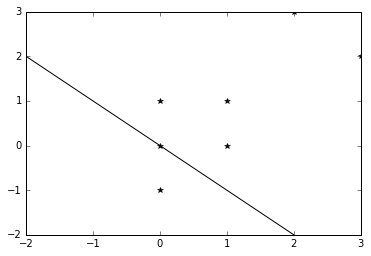

In [34]:
#PLOTS
W0 = [clf.coef0]
WS = clf.coef_[0]
X1s = np.linspace(-2, 2, num=100)
print WS[1]
X2s = (-WS[0]*X1s - W0 ) / float(WS[1])
#print X1s / float(WS[1])

print 'La barrera es:'
plt.plot(X1s ,X2s,'-k')
#Xplot = X.as_matrix()
plt.plot(Xplot[:,0],Xplot[:,1],'*k')

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
4400,0.0,0.0,1.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.656,0.0,0.656,0.0,0.0,1.488,5,67


El Naive Bayes de Mariana da...
confusionmatrix =  [[521 193]
 [ 28 409]]
precision =  0.679401993355
recall =  0.935926773455
Accuracy Score =  0.807993049522


(0.9583333333333334, 0.7151079136690648)


## Usando Naive Bayes

array([[496, 176],
       [ 15, 464]])

In [20]:
prob_ac_spam = (float(499)/float(499+196))
prob_aciertos_nospam = float(437)/float(437+19)
print(prob_aciertos_nospam, prob_ac_spam)

(0.9583333333333334, 0.7179856115107913)


confusionmatrix =  [[496 176]
 [ 15 464]]
precision =  0.725
recall =  0.968684759916
Accuracy Score =  0.834057341442
